In [1]:
# Import pandas and numpy

import numpy as np
import pandas as pd

In [2]:
# Use the code below to generate a data frame for students

# Your data frame should include the student number, student name, shoe_size, and favorite number.

# Store your data frame in a variable named students



students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

student_number = list(range(1, len(students) + 1))
shoe_sizes = np.random.choice(np.arange(6, 14, 0.5), len(students))
side_of_classroom = np.random.choice(['left', 'right'], len(students))
favorite_number = np.random.randint(1, 11, len(students))


students = pd.DataFrame({'student_number': student_number,
                         'student_name': students,
                         'shoe_size': shoe_sizes,
                         'favorite_number': favorite_number,
                         'side_of_classroom': side_of_classroom})


students

,student_number,student_name,shoe_size,favorite_number,side_of_classroom
0,1,Sally,9.0,1,right
1,2,Jane,8.0,2,left
2,3,Suzie,12.0,1,left
3,4,Billy,9.0,8,right
4,5,Ada,11.0,3,right
5,6,John,11.5,10,right
6,7,Thomas,10.0,10,left
7,8,Marie,7.0,5,right
8,9,Albert,12.0,6,left
9,10,Richard,10.0,9,right


In [3]:
# Print out the shape of the data frame.

students.shape

(12, 5)

In [4]:
# Print out the names of the columns in the data frame.

students.columns

Index(['student_number', 'student_name', 'shoe_size', 'favorite_number',
       'side_of_classroom'],
      dtype='object')

In [5]:
# Rename 2 of the columns in your data frame.

students.rename(columns={'student_name': 'first_name', 
                         'student_number': 'student_num'})

,student_num,first_name,shoe_size,favorite_number,side_of_classroom
0,1,Sally,9.0,1,right
1,2,Jane,8.0,2,left
2,3,Suzie,12.0,1,left
3,4,Billy,9.0,8,right
4,5,Ada,11.0,3,right
5,6,John,11.5,10,right
6,7,Thomas,10.0,10,left
7,8,Marie,7.0,5,right
8,9,Albert,12.0,6,left
9,10,Richard,10.0,9,right


In [6]:
# Create a new data frame based on the one you have. 
# The new data frame should only have columns for 
# shoe size and side of the classroom.

class_df = pd.DataFrame({'shoe_size': shoe_sizes,
                         "class_size": side_of_classroom})

In [7]:
class_df

,shoe_size,class_size
0,9.0,right
1,8.0,left
2,12.0,left
3,9.0,right
4,11.0,right
5,11.5,right
6,10.0,left
7,7.0,right
8,12.0,left
9,10.0,right


In [8]:
# Create a new data frame that has all of the columns, 
# but only 5 rows.

class_df_5 = class_df.head(5)

class_df_5

,shoe_size,class_size
0,9.0,right
1,8.0,left
2,12.0,left
3,9.0,right
4,11.0,right


In [9]:
# Create a new data frame that has only columns 
# for favorite number and name, and only includes 7 rows.

name_num_df = students[['student_name', 'favorite_number']].head(7)
name_num_df

,student_name,favorite_number
0,Sally,1
1,Jane,2
2,Suzie,1
3,Billy,8
4,Ada,3
5,John,10
6,Thomas,10


In [10]:
# Create a new column for the ratio of shoe size to 
# the favorite number. Name this ss_to_fn

ss_to_fn = students[['shoe_size', 'favorite_number']]
ss_to_fn.assign(ratio=shoe_sizes / favorite_number)


,shoe_size,favorite_number,ratio
0,9.0,1,9.000000
1,8.0,2,4.000000
2,12.0,1,12.000000
3,9.0,8,1.125000
4,11.0,3,3.666667
5,11.5,10,1.150000
6,10.0,10,1.000000
7,7.0,5,1.400000
8,12.0,6,2.000000
9,10.0,9,1.111111


In [11]:
# Create a new column that contains the z-score for the shoe size.

shoe_df = students[['shoe_size']]
mean = shoe_df.mean()
std = shoe_df.std()
z = (shoe_df - mean) / std
shoe_df.assign(z_score=z)

,shoe_size,z_score
0,9.0,-0.396059
1,8.0,-0.990148
2,12.0,1.386207
3,9.0,-0.396059
4,11.0,0.792118
5,11.5,1.089162
6,10.0,0.198030
7,7.0,-1.584236
8,12.0,1.386207
9,10.0,0.198030


In [12]:
# Transform the side_of_the_classroom columns 
# such that the values are either R or L.

side_df = pd.DataFrame({'side': side_of_classroom})

def xform(side):
    return side[0].upper()

side_df.side.apply(xform)

0     R
1     L
2     L
3     R
4     R
5     R
6     L
7     R
8     L
9     R
10    R
11    R
Name: side, dtype: object

In [13]:
# Find the names of all the students 
# that have a shoe size greater than the 3rd quartile of shoe sizes 
# (You can use the .quantile method on a series for this)

students[students.shoe_size < students.shoe_size.quantile(0.25)]


,student_number,student_name,shoe_size,favorite_number,side_of_classroom
1,2,Jane,8.0,2,left
7,8,Marie,7.0,5,right
10,11,Isaac,8.0,3,right


In [14]:
# Find the names of all the students that have a shoe size 
# less than the 1st quartile of shoe sizes

students[students.shoe_size > students.shoe_size.quantile(0.25)]



,student_number,student_name,shoe_size,favorite_number,side_of_classroom
0,1,Sally,9.0,1,right
2,3,Suzie,12.0,1,left
3,4,Billy,9.0,8,right
4,5,Ada,11.0,3,right
5,6,John,11.5,10,right
6,7,Thomas,10.0,10,left
8,9,Albert,12.0,6,left
9,10,Richard,10.0,9,right
11,12,Alan,8.5,8,right


In [15]:
students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

student_number = list(range(1, len(students) + 1))
shoe_sizes = np.random.choice(np.arange(6, 14, 0.5), len(students))
side_of_classroom = np.random.choice(['left', 'right'], len(students))
favorite_number = np.random.randint(1, 11, len(students))


students_df = pd.DataFrame({'student_number': student_number,
                         'student_name': students,
                         'shoe_size': shoe_sizes,
                         'favorite_number': favorite_number,
                         'side_of_class': side_of_classroom})


students_df

,student_number,student_name,shoe_size,favorite_number,side_of_class
0,1,Sally,11.5,3,left
1,2,Jane,11.0,3,right
2,3,Suzie,9.0,1,left
3,4,Billy,8.5,1,right
4,5,Ada,7.5,8,right
5,6,John,10.0,2,left
6,7,Thomas,9.5,5,left
7,8,Marie,8.0,1,right
8,9,Albert,12.0,9,left
9,10,Richard,10.0,4,left


In [16]:
# Calculate the mean, median, min, and max for the shoe sizes and favorite numbers

students_df[['shoe_size','favorite_number']].agg([np.mean, np.median, np.min, np.max])


,shoe_size,favorite_number
mean,9.916667,3.666667
median,10.000000,3.000000
amin,7.500000,1.000000
amax,12.000000,9.000000


In [17]:
# Sort the data frame by the students shoe size

students_df.sort_values('shoe_size')


,student_number,student_name,shoe_size,favorite_number,side_of_class
4,5,Ada,7.5,8,right
7,8,Marie,8.0,1,right
3,4,Billy,8.5,1,right
2,3,Suzie,9.0,1,left
6,7,Thomas,9.5,5,left
5,6,John,10.0,2,left
9,10,Richard,10.0,4,left
10,11,Isaac,10.5,3,right
1,2,Jane,11.0,3,right
0,1,Sally,11.5,3,left


In [18]:
# Sort the data frame by the side of the classroom, then by their student number

students_df.sort_values('side_of_class')


,student_number,student_name,shoe_size,favorite_number,side_of_class
0,1,Sally,11.5,3,left
2,3,Suzie,9.0,1,left
5,6,John,10.0,2,left
6,7,Thomas,9.5,5,left
8,9,Albert,12.0,9,left
9,10,Richard,10.0,4,left
11,12,Alan,11.5,4,left
1,2,Jane,11.0,3,right
3,4,Billy,8.5,1,right
4,5,Ada,7.5,8,right


In [19]:
# Find the number of students on each side of the classroom

students_df.groupby('side_of_class')['side_of_class'].count()

side_of_class
left     7
right    5
Name: side_of_class, dtype: int64

In [20]:
# Find the average shoe size for each side of the classroom

students_df.groupby('side_of_class')['shoe_size'].mean()

side_of_class
left     10.5
right     9.1
Name: shoe_size, dtype: float64

In [21]:
# Find the maximum favorite number for each side of the classroom

students_df.groupby('side_of_class')['favorite_number'].max()


side_of_class
left     9
right    8
Name: favorite_number, dtype: int64

In [22]:
# Create a pie chart that visualizes the number of students on each side of the classroom.
import matplotlib.pyplot as plt


num = students_df.groupby('side_of_class')['side_of_class'].count()
num.plot.pie()

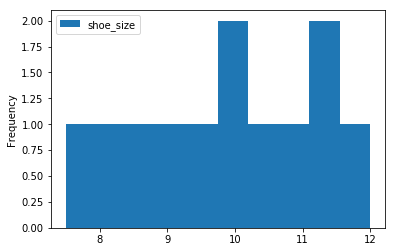

In [23]:
# Create a histogram of the shoe sizes in the classroom

students_df[['shoe_size']].plot.hist()


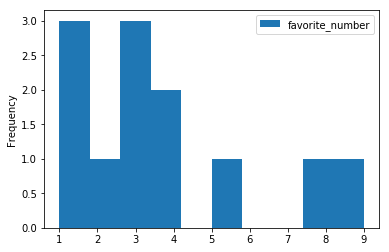

In [24]:
# Create a histogram of the favorite numbers in the classroom

students_df[['favorite_number']].plot.hist()



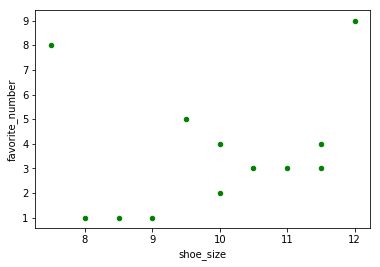

In [25]:
# Create a scatter plot of shoe size vs favorite number

students_df.plot.scatter(x='shoe_size', y='favorite_number',c='g')


In [26]:
# Save the students data to a csv file.

students_df.to_csv('students_df.csv')

In [27]:
# Read the data from the csv file back into pandas. What do you notice?



In [34]:
# Create a data frame based on the profiles.json file. Explore this data frame's structure

profiles_df = pd.read_json('profiles.json')

profiles_df

,_id,about,address,age,balance,company,email,eyeColor,favoriteFruit,friends,...,guid,index,isActive,latitude,longitude,name,phone,picture,registered,tags
0,54e23c3e46ab53a440b580e8,Sit cillum deserunt irure laboris tempor fugia...,"121 Emmons Avenue, Klondike, Kentucky, 5975",39,"$2,097.02",ANDRYX,hebertestes@andryx.com,blue,strawberry,"[{'id': 0, 'name': 'Tanisha Leonard'}, {'id': ...",...,9962b468-ef3e-4993-b677-617469bc3008,0,False,-80.157843,161.930160,Hebert Estes,+1 (866) 456-2268,http://placehold.it/32x32,2014-11-10T01:44:03 +06:00,"[sit, occaecat, non, ea, sit, laboris, exercit..."
1,54e23c3ef5cc0d250968c212,Esse quis cillum sunt occaecat ad et eu incidi...,"724 Brevoort Place, Lodoga, Indiana, 3880",30,"$3,654.02",PHARMACON,allisonwynn@pharmacon.com,green,apple,"[{'id': 0, 'name': 'Curry Cox'}, {'id': 1, 'na...",...,905f849d-49bf-4a57-b4f3-5d6e4bf1b04c,1,False,55.737207,-167.177561,Allison Wynn,+1 (926) 525-3131,http://placehold.it/32x32,2014-06-10T13:41:26 +05:00,"[enim, officia, laboris, irure, veniam, occaec..."
2,54e23c3e09cc6875638cd36b,Deserunt adipisicing proident exercitation cil...,"941 Cox Place, Bluffview, Georgia, 5882",31,"$1,536.02",QUONK,jacobsfloyd@quonk.com,brown,banana,"[{'id': 0, 'name': 'Robles Chan'}, {'id': 1, '...",...,1b042d48-9cfa-4db5-8b60-4104165591c3,2,True,30.215667,68.831905,Jacobs Floyd,+1 (853) 537-3315,http://placehold.it/32x32,2014-07-30T03:17:32 +05:00,"[est, aute, laborum, sint, anim, sit, consecte..."
3,54e23c3e54e4094147a3b1da,Aliqua sunt exercitation quis cupidatat fugiat...,"518 Randolph Street, Whitestone, Arizona, 8189",20,"$3,919.64",INRT,fayhammond@inrt.com,green,banana,"[{'id': 0, 'name': 'Dudley Booker'}, {'id': 1,...",...,69eb3454-8acc-46f1-a636-c6df00dfb542,3,False,33.825844,-65.969538,Fay Hammond,+1 (922) 429-2592,http://placehold.it/32x32,2015-01-30T08:05:38 +06:00,"[aliqua, esse, sint, pariatur, commodo, do, anim]"
4,54e23c3e177caf5567ba87ac,Irure excepteur consequat esse qui tempor dese...,"604 Just Court, Eastvale, Federated States Of ...",39,"$3,681.39",WAZZU,chasitymarsh@wazzu.com,green,apple,"[{'id': 0, 'name': 'Kristina Glover'}, {'id': ...",...,97962c85-7700-4ffa-a01e-2fcbc147fd81,4,False,-31.660978,37.559095,Chasity Marsh,+1 (976) 425-2362,http://placehold.it/32x32,2014-07-31T06:03:19 +05:00,"[aliquip, duis, irure, amet, aliquip, dolore, ..."
5,54e23c3eaffbb506aa15ec1c,Qui ad commodo elit voluptate cupidatat exerci...,"101 Haring Street, Nicut, Louisiana, 1473",30,"$1,694.42",EARTHWAX,camachocortez@earthwax.com,brown,apple,"[{'id': 0, 'name': 'Sexton Tillman'}, {'id': 1...",...,fc3e04d1-44c2-449e-891a-d4f8053d14a4,5,True,74.434627,69.527088,Camacho Cortez,+1 (869) 528-2019,http://placehold.it/32x32,2014-03-17T12:04:00 +05:00,"[et, sit, in, id, ullamco, elit, laborum]"
6,54e23c3e0fd8074c2ca52667,Minim consequat anim ad et tempor et pariatur ...,"569 Oakland Place, Beyerville, Puerto Rico, 2395",35,"$1,214.10",TERSANKI,averyflynn@tersanki.com,green,banana,"[{'id': 0, 'name': 'Ball Henson'}, {'id': 1, '...",...,af8d9a03-fde9-4039-b20c-c4708d4cfc3c,6,False,-89.879409,143.441709,Avery Flynn,+1 (966) 404-2471,http://placehold.it/32x32,2014-04-13T10:25:03 +05:00,"[quis, esse, Lorem, minim, nostrud, voluptate,..."
7,54e23c3eb112d96e4204914d,Minim proident minim consectetur nostrud dolor...,"808 Duryea Court, Downsville, Northern Mariana...",23,"$2,930.31",ORBIXTAR,michaelcash@orbixtar.com,blue,strawberry,"[{'id': 0, 'name': 'Rodgers Nolan'}, {'id': 1,...",...,95f1c020-f9eb-4a29-b236-e766759d89d0,7,False,-86.621367,-4.061970,Michael Cash,+1 (996) 439-3660,http://placehold.it/32x32,2014-05-24T17:56:54 +05:00,"[eu, sit, dolore, culpa, Lorem, in, esse]"
8,54e23c3ef30f14d0e5afddf3,Ullamco ea esse ullamco commodo quis amet ut a...,"684 Stratford Road, Rosine, District Of Columb...",25,"$1,944.15",KIDSTOCK,madeleinebray@kidstock.com,green,strawberry,"[{'id': 0, 'name': 'Herrera Doyle'}, {'id': 1,...",...,bde2d56f-2488-40d0-a7d2-21019ee8a18b,8,False,45.118798,-7.698707,Madele

In [47]:
# Write the code necessary to create a data frame based on the results of a SQL query to the numbers database.

conn_num = get_connection('numbers', user, host, password)
df_sql_numbers = pd.read_sql('select n from numbers', conn_num)
df_sql_numbers

,n
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [37]:
def get_connection(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [38]:
from env import user, host, password

In [39]:
import pandas as pd
conn = get_connection('ada_students', user, host, password)

In [40]:
df_sql = pd.read_sql('select student_id, group_id from student_groups where module_id = 5;', conn)

In [41]:
df_sql

,student_id,group_id
0,661,3
1,663,1
2,664,4
3,665,8
4,667,7
5,668,6
6,669,6
7,670,4
8,671,2
9,673,4


In [42]:
df_sql_name = pd.read_sql('select student_id, first_name from students;', conn)

In [43]:
df_sql_name

,student_id,first_name
0,661,Sandy
1,663,Chad
2,664,Jessica
3,665,Matthew
4,667,Kathryn
5,668,Steven
6,669,Joseph
7,670,Nicole
8,671,Norrick
9,673,Gary
